In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


{'train_ctrUa4K.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urb

In [214]:
data=pd.read_csv('train_ctrUa4K.csv')

In [215]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [216]:
data.shape

(614, 13)

In [217]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [219]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History' ]:
  data[i]=data[i].fillna(data[i].median())

In [221]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [222]:
for i in ['Gender','Married','Dependents','Self_Employed' ]:
  data[i]=data[i].fillna(data[i].mode)

In [223]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [224]:
from sklearn.preprocessing import LabelEncoder

In [225]:
label_encoder=LabelEncoder()

In [226]:
from sklearn.preprocessing import LabelEncoder

In [227]:
data['Education']=label_encoder.fit_transform(data['Education'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [228]:
data['Property_Area']=label_encoder.fit_transform(data['Property_Area'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,Y


In [229]:
data['Loan_Status']=label_encoder.fit_transform(data['Loan_Status'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,1


In [230]:
for i in ['Gender','Married','Dependents','Self_Employed' ]:
 data[i]=data[i].astype(str)


In [231]:
for i in ['Gender','Married','Dependents','Self_Employed' ]:
  data[i]=label_encoder.fit_transform(data[i])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


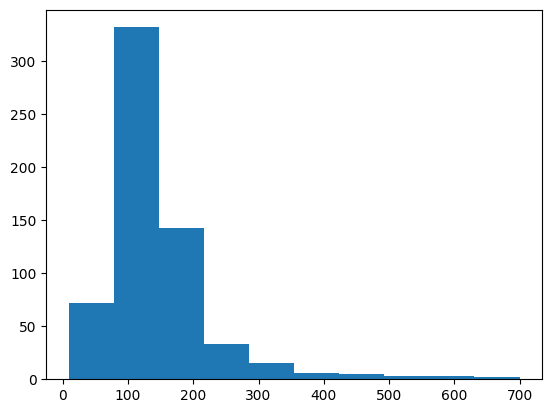

In [232]:
plt.hist(data['LoanAmount'])
plt.show()

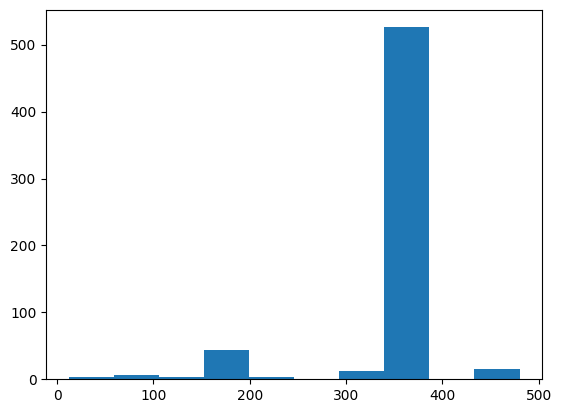

In [233]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

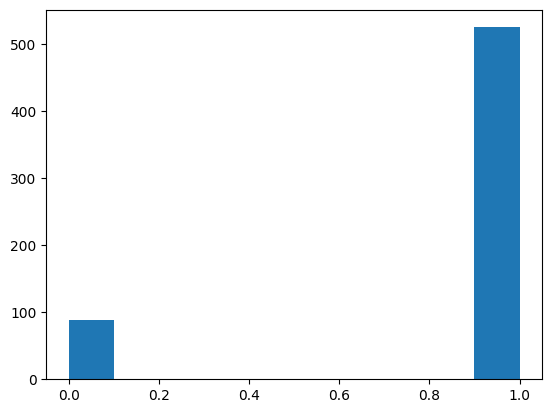

In [234]:
plt.hist(data['Credit_History'])
plt.show()

In [235]:
import seaborn as sns

<ipython-input-236-84f1b6063ea9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()


<Axes: >

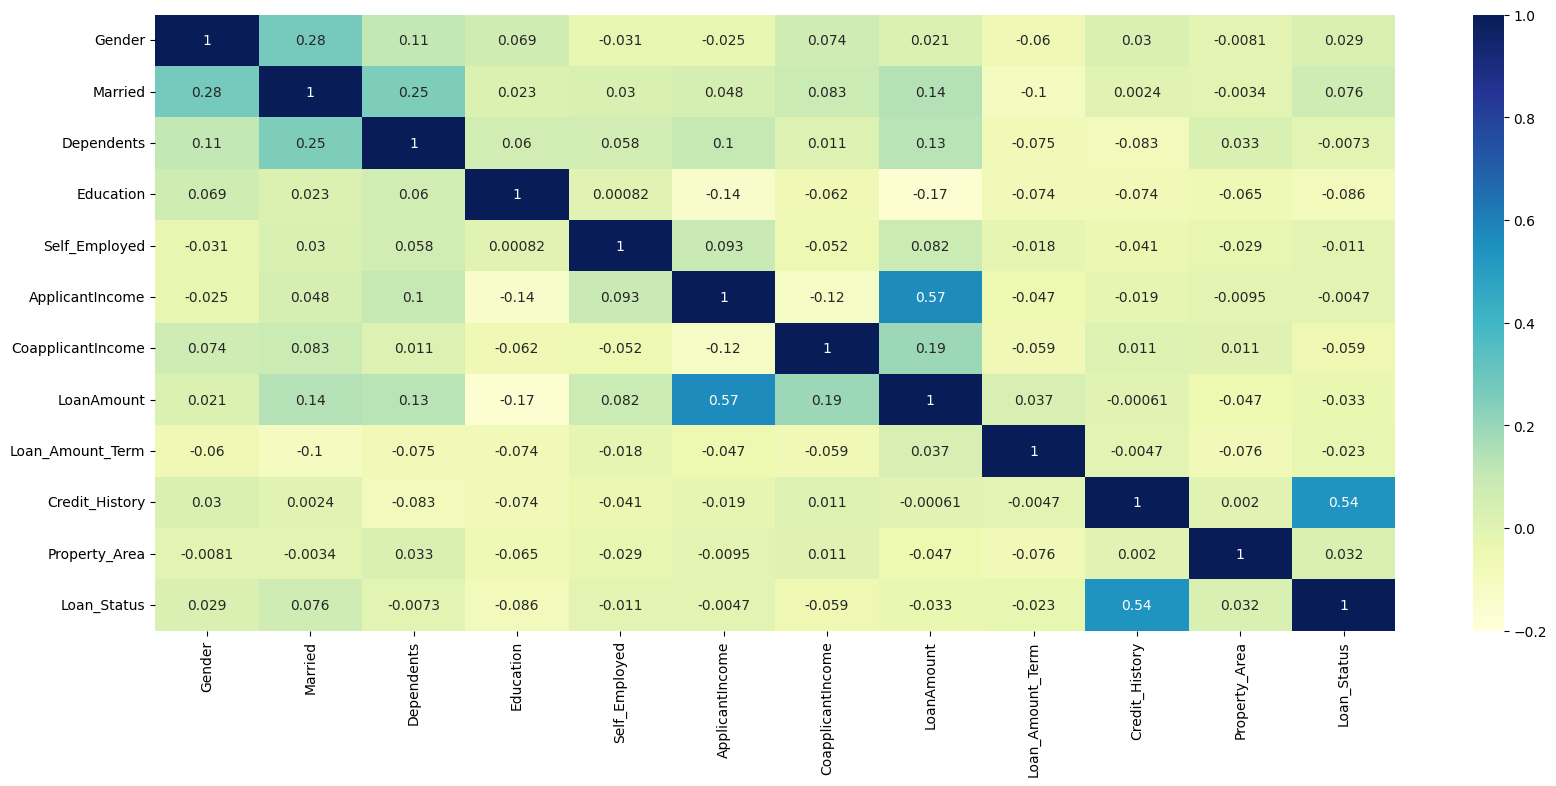

In [236]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

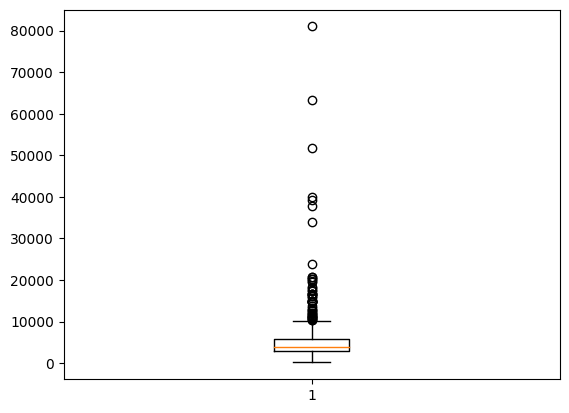

In [237]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

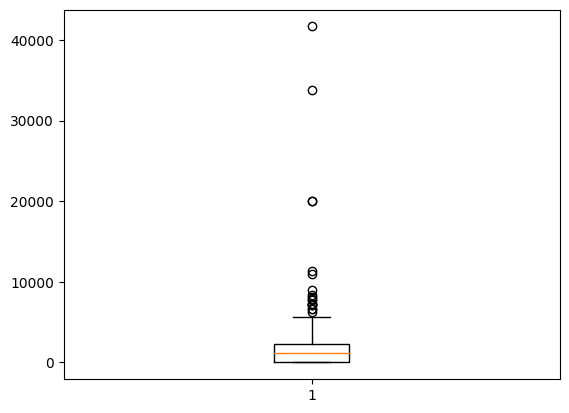

In [238]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

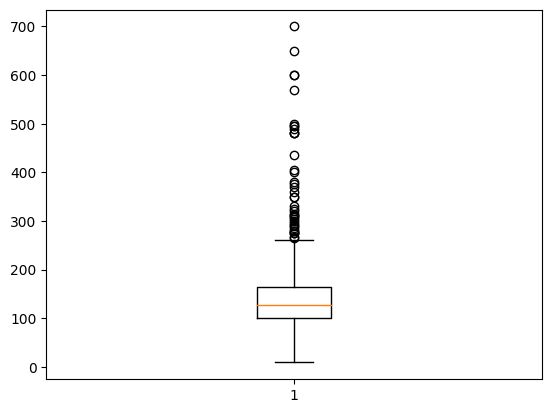

In [239]:
plt.boxplot(data['LoanAmount'])
plt.show()

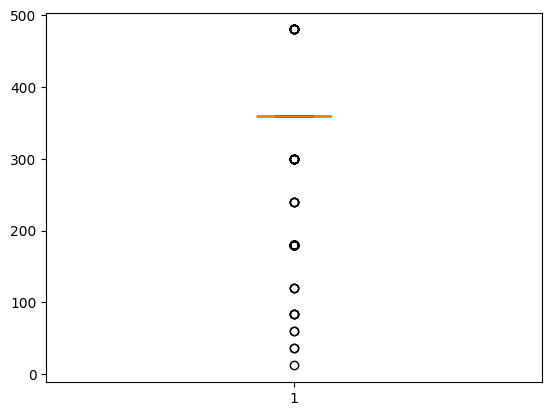

In [240]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [241]:
Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2879.0
3812.5
5790.0


<ipython-input-241-4fae17f038c8>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
<ipython-input-241-4fae17f038c8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
<ipython-input-241-4fae17f038c8>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
 

In [242]:
IQR=Q3-Q1
IQR

2911.0

In [243]:
up_lim=Q3+1.5*IQR
up_lim

10156.5

In [244]:
low_lim=Q1-1.5*IQR
low_lim

-1487.5

In [245]:
def handle_outliers(hand_applicant_income,low_lim,up_lim):
  for i in range(len(hand_applicant_income)):
    if hand_applicant_income[i]<low_lim:
      hand_applicant_income[i]=low_lim
    elif hand_applicant_income[i]>up_lim:
      hand_applicant_income[i]=up_lim
    else:
      hand_applicant_income[i]==hand_applicant_income
  return handle_outliers




In [246]:
new_app_income = data['ApplicantIncome']
handle_outliers(new_app_income,low_lim,up_lim)
print(new_app_income)

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64


<ipython-input-245-16c003c19708>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_applicant_income[i]=up_lim


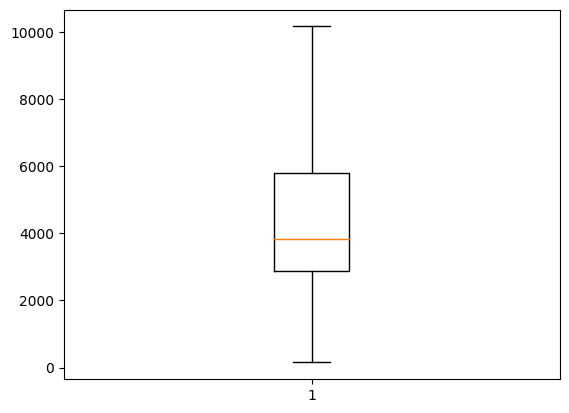

In [247]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [248]:
Q1=np.percentile(data['CoapplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['CoapplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data['CoapplicantIncome'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
1188.5
2292.5


<ipython-input-248-a003f23a619e>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['CoapplicantIncome'],25,interpolation='midpoint')
<ipython-input-248-a003f23a619e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['CoapplicantIncome'],50,interpolation='midpoint')
<ipython-input-248-a003f23a619e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

In [249]:
IQR=Q3-Q1
IQR

2292.5

In [250]:
up_lim=Q3+1.5*IQR
up_lim

5731.25

In [251]:
low_lim=Q1-1.5*IQR
low_lim

-3438.75

In [252]:
def handle_outliers(hand_coapplicant_income,low_lim,up_lim):
  for i in range(len(hand_coapplicant_income)):
    if hand_coapplicant_income[i]<low_lim:
      hand_coapplicant_income[i]=low_lim
    elif hand_coapplicant_income[i]>up_lim:
      hand_coapplicant_income[i]=up_lim
    else:
      hand_coapplicant_income[i]==hand_coapplicant_income
  return handle_outliers



In [253]:
new_coapp_income = data['CoapplicantIncome']
handle_outliers(new_coapp_income,low_lim,up_lim)
print(new_coapp_income)

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64


<ipython-input-252-b53167421a1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_coapplicant_income[i]=up_lim


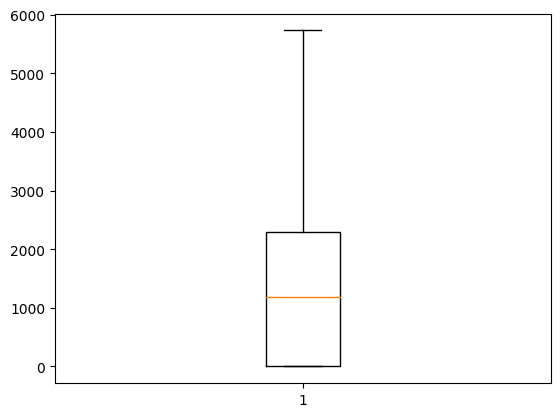

In [254]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [255]:
Q1=np.percentile(data['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(data['LoanAmount'],50,interpolation='midpoint')
Q3=np.percentile(data['LoanAmount'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

100.5
128.0
164.5


<ipython-input-255-1b8c449bfbe9>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['LoanAmount'],25,interpolation='midpoint')
<ipython-input-255-1b8c449bfbe9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['LoanAmount'],50,interpolation='midpoint')
<ipython-input-255-1b8c449bfbe9>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.per

In [256]:
IQR=Q3-Q1
IQR

64.0

In [257]:
up_lim=Q3+1.5*IQR
up_lim

260.5

In [258]:
low_lim=Q1-1.5*IQR
low_lim

4.5

In [259]:
def handle_outliers(hand_loan_amount,low_lim,up_lim):
  for i in range(len(hand_loan_amount)):
    if hand_loan_amount[i]<low_lim:
      hand_loan_amount[i]=low_lim
    elif hand_loan_amount[i]>up_lim:
      hand_loan_amount[i]=up_lim
    else:
      hand_loan_amount[i]==hand_loan_amount
  return handle_outliers

In [260]:
new_loan_amount = data['LoanAmount']
handle_outliers(new_loan_amount,low_lim,up_lim)
print(new_loan_amount)

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


<ipython-input-259-c94ae603347a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount[i]=up_lim


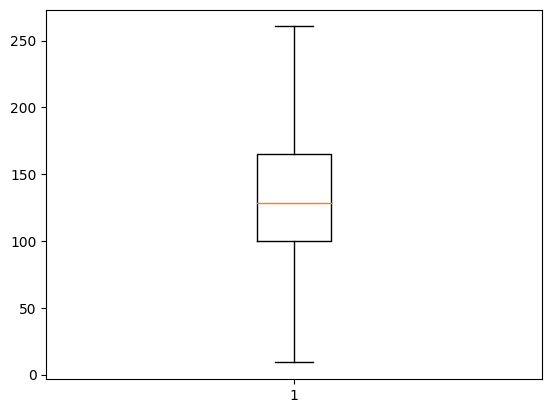

In [261]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [262]:
data.drop('Loan_ID',axis=1,inplace=True)

In [263]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.775244,1.643322,0.842020,0.218241,1.081433,4615.910423,1419.354104,137.298860,342.410423,0.855049,1.037459,0.687296
std,0.465767,0.489511,1.120531,0.413389,0.423472,2477.158964,1623.678913,55.631264,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,10156.500000,5731.250000,260.500000,480.000000,1.000000,2.000000,1.000000


In [264]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [265]:
x1= x.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [266]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1 = min_max_scaler.fit_transform(x1)
x1

array([[0.56952981, 0.        , 0.47316103],
       [0.44301204, 0.26311887, 0.47316103],
       [0.28481487, 0.        , 0.22664016],
       ...,
       [0.7916854 , 0.04187568, 0.97017893],
       [0.74281717, 0.        , 0.70775348],
       [0.44301204, 0.        , 0.49304175]])

In [267]:
x1=pd.DataFrame(x1,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.569530,0.000000,0.473161
1,0.443012,0.263119,0.473161
2,0.284815,0.000000,0.226640
3,0.243142,0.411429,0.441352
4,0.584620,0.000000,0.524851
...,...,...,...
609,0.274821,0.000000,0.246521
610,0.395343,0.000000,0.123260
611,0.791685,0.041876,0.970179
612,0.742817,0.000000,0.707753


In [268]:
x1=pd.DataFrame(x,columns=[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849.0,0.0,128.0
1,4583.0,1508.0,128.0
2,3000.0,0.0,66.0
3,2583.0,2358.0,120.0
4,6000.0,0.0,141.0
...,...,...,...
609,2900.0,0.0,71.0
610,4106.0,0.0,40.0
611,8072.0,240.0,253.0
612,7583.0,0.0,187.0


In [269]:
x2=x.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,360.0,1.0,2
1,2,2,1,0,1,360.0,1.0,0
2,2,2,0,0,2,360.0,1.0,2
3,2,2,0,1,1,360.0,1.0,2
4,2,1,0,0,1,360.0,1.0,2
...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0
610,2,2,3,0,1,180.0,1.0,0
611,2,2,1,0,1,360.0,1.0,2
612,2,2,2,0,1,360.0,1.0,2


In [270]:
x3=pd.concat([x2,x1],axis=1)
x3

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,2,1,0,0,1,360.0,1.0,2,5849.0,0.0,128.0
1,2,2,1,0,1,360.0,1.0,0,4583.0,1508.0,128.0
2,2,2,0,0,2,360.0,1.0,2,3000.0,0.0,66.0
3,2,2,0,1,1,360.0,1.0,2,2583.0,2358.0,120.0
4,2,1,0,0,1,360.0,1.0,2,6000.0,0.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0,2900.0,0.0,71.0
610,2,2,3,0,1,180.0,1.0,0,4106.0,0.0,40.0
611,2,2,1,0,1,360.0,1.0,2,8072.0,240.0,253.0
612,2,2,2,0,1,360.0,1.0,2,7583.0,0.0,187.0


In [271]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x3,y,random_state=42,test_size=0.25)

**Logistic Regression**

In [272]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [273]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.7792207792207793
precision is 0.7538461538461538
Recall is 0.98
f1 score is 0.8521739130434782


In [274]:
confusion_matrix(y_test,y_pred)

array([[22, 32],
       [ 2, 98]])

**KNN**

In [275]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

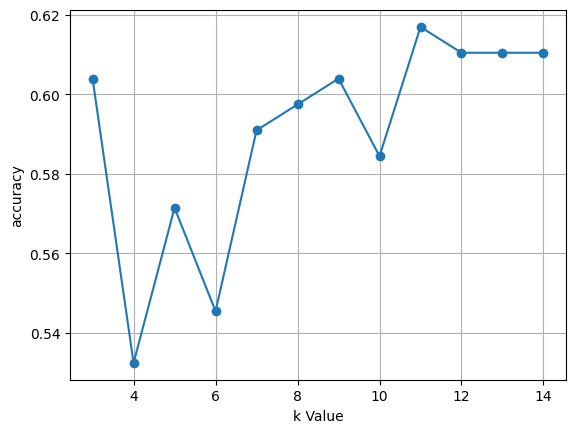

In [276]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [277]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [278]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)     

Accuracy is 0.6168831168831169
precision is 0.6453900709219859
Recall is 0.91
f1 score is 0.7551867219917013


array([[ 4, 50],
       [ 9, 91]])

**Decision Tree**

In [279]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [280]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.6818181818181818
[[26 28]
 [21 79]]


Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [282]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.7662337662337663
[[24 30]
 [ 6 94]]


In [283]:
#### svm
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred= svmclf.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [284]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is: ', accuracy_score(y_test,y_pred))

Accuracy is:  0.7857142857142857


In [285]:
# hyper parameter tuning
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20)

In [286]:
y_pred= rf_clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [287]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.7727272727272727
[[21 33]
 [ 2 98]]


Test data

In [72]:
from google.colab import files
files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv


{'test_lAUu6dG.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2,Graduat

In [288]:
data1=pd.read_csv('/content/test_lAUu6dG.csv')

In [289]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [290]:
data1.shape

(367, 12)

In [291]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [292]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [293]:
data1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

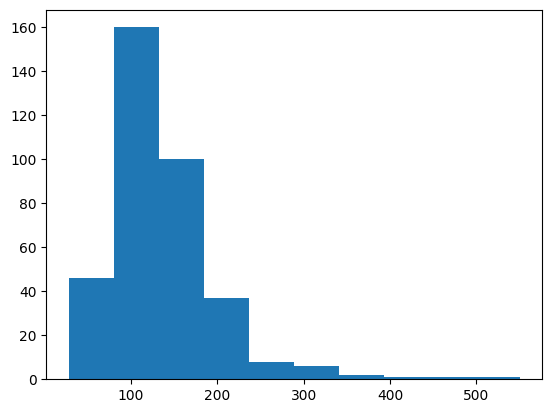

In [294]:
plt.hist(data1['LoanAmount'])
plt.show()

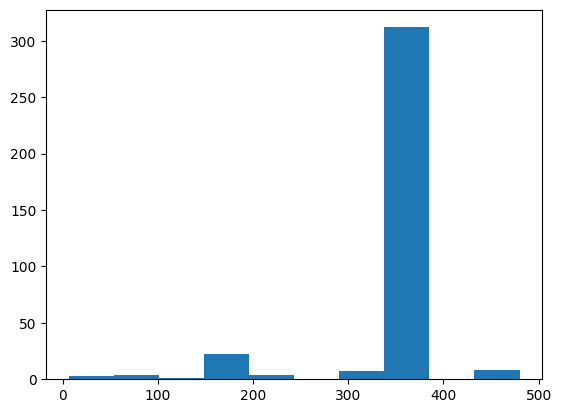

In [295]:
plt.hist(data1['Loan_Amount_Term'])
plt.show()

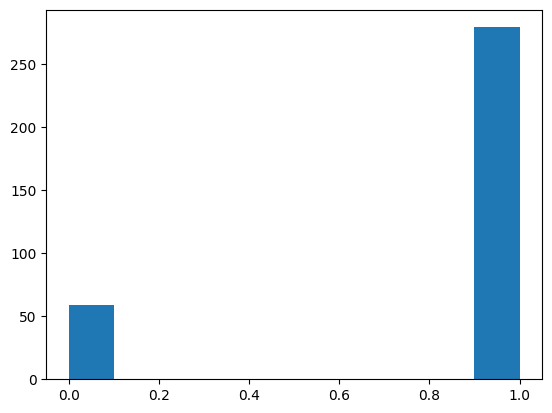

In [296]:
plt.hist(data1['Credit_History'])
plt.show()

In [297]:
for i in ['Gender','Dependents','Self_Employed']:
  data1[i]=test_data1[i].fillna(data1[i].mode)

In [298]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  data1[i]=data1[i].fillna(data1[i].median())

In [299]:
data1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [300]:
data2=data1.drop('Loan_ID',axis=1)
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,Yes,0,Graduate,1,5720,0,110.0,360.0,1.0,Urban
1,2,Yes,1,Graduate,1,3076,1500,126.0,360.0,1.0,Urban
2,2,Yes,2,Graduate,1,5000,1800,208.0,360.0,1.0,Urban
3,2,Yes,2,Graduate,1,2340,2546,100.0,360.0,1.0,Urban
4,2,No,0,Not Graduate,1,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,2,Yes,3,Not Graduate,2,4009,1777,113.0,360.0,1.0,Urban
363,2,Yes,0,Graduate,1,4158,709,115.0,360.0,1.0,Urban
364,2,No,0,Graduate,1,3250,1993,126.0,360.0,1.0,Semiurban
365,2,Yes,0,Graduate,1,5000,2393,158.0,360.0,1.0,Rural


In [301]:
#encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in data2.columns:
  if data2[col].dtype=='object':
    data2[col]=label_encoder.fit_transform(data2[col].astype(str))

In [302]:
data2.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [303]:
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,5720,0,110.0,360.0,1.0,2
1,2,1,1,0,1,3076,1500,126.0,360.0,1.0,2
2,2,1,2,0,1,5000,1800,208.0,360.0,1.0,2
3,2,1,2,0,1,2340,2546,100.0,360.0,1.0,2
4,2,0,0,1,1,3276,0,78.0,360.0,1.0,2


In [304]:
data2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4805.599455,1569.577657,135.980926,342.822888,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,4910.685399,2334.232099,60.959739,64.658402,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


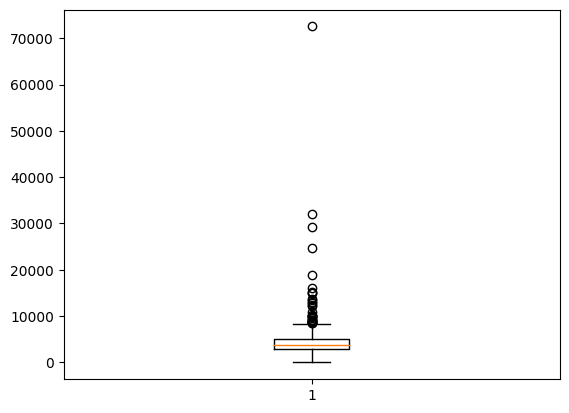

In [305]:
plt.boxplot(data2['ApplicantIncome'])
plt.show()

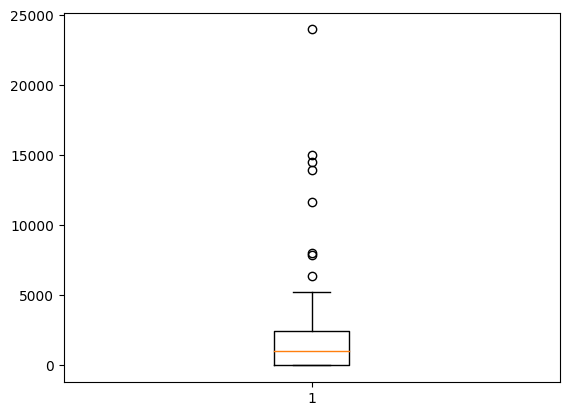

In [306]:
plt.boxplot(data2['CoapplicantIncome'])
plt.show()

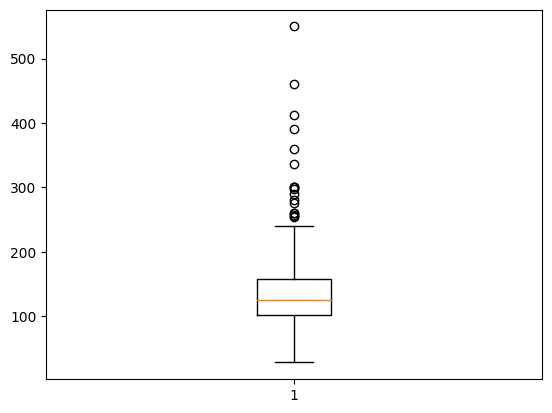

In [307]:
plt.boxplot(data2['LoanAmount'])
plt.show()

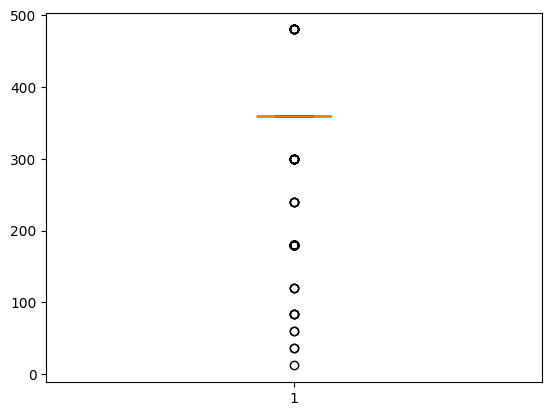

In [308]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [309]:
Q1=np.percentile(data2['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data2['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data2['ApplicantIncome'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2864.0
3786.0
5060.0


<ipython-input-309-41db600efe85>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['ApplicantIncome'],25,interpolation='midpoint')
<ipython-input-309-41db600efe85>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data2['ApplicantIncome'],50,interpolation='midpoint')
<ipython-input-309-41db600efe85>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

In [310]:
IQR=Q3-Q1
IQR

2196.0

In [311]:
up_lim=Q3+1.5*IQR
up_lim

8354.0

In [312]:
low_lim=Q1-1.5*IQR
low_lim

-430.0

In [313]:
def handle_outliers(hand_applicant_income,low_lim,up_lim):
  for i in range(len(hand_applicant_income)):
    if hand_applicant_income[i]<low_lim:
      hand_applicant_income[i]=low_lim
    elif hand_applicant_income[i]>up_lim:
      hand_applicant_income[i]=up_lim
    else:
      hand_applicant_income[i]==hand_applicant_income
  return handle_outliers

In [314]:
new_app_income = data['ApplicantIncome']
handle_outliers(new_app_income,low_lim,up_lim)
print(new_app_income)

<ipython-input-313-e28f71589472>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_applicant_income[i]=up_lim


0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64


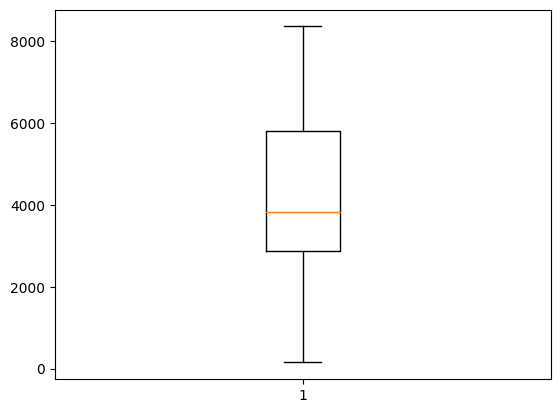

In [315]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [316]:
data2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4805.599455,1569.577657,135.980926,342.822888,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,4910.685399,2334.232099,60.959739,64.658402,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


In [317]:

Q1=np.percentile(data2['CoapplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data2['CoapplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data2['CoapplicantIncome'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)


0.0
1025.0
2430.5


<ipython-input-317-4185af796aca>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['CoapplicantIncome'],25,interpolation='midpoint')
<ipython-input-317-4185af796aca>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data2['CoapplicantIncome'],50,interpolation='midpoint')
<ipython-input-317-4185af796aca>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1

In [318]:
IQR=Q3-Q1
IQR

2430.5

In [319]:
up_lim=Q3+1.5*IQR
up_lim

6076.25

In [320]:
low_lim=Q1-1.5*IQR
low_lim

-3645.75

In [321]:
def handle_outliers(hand_coapplicant_income,low_lim,up_lim):
  for i in range(len(hand_coapplicant_income)):
    if hand_coapplicant_income[i]<low_lim:
      hand_coapplicant_income[i]=low_lim
    elif hand_coapplicant_income[i]>up_lim:
      hand_coapplicant_income[i]=up_lim
    else:
      hand_coapplicant_income[i]==hand_coapplicant_income
  return handle_outliers

In [322]:
new_coapp_income = data2['CoapplicantIncome']
handle_outliers(new_coapp_income,low_lim,up_lim)
print(new_coapp_income)

0         0.0
1      1500.0
2      1800.0
3      2546.0
4         0.0
        ...  
362    1777.0
363     709.0
364    1993.0
365    2393.0
366       0.0
Name: CoapplicantIncome, Length: 367, dtype: float64


<ipython-input-321-3549c90d3ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_coapplicant_income[i]=up_lim


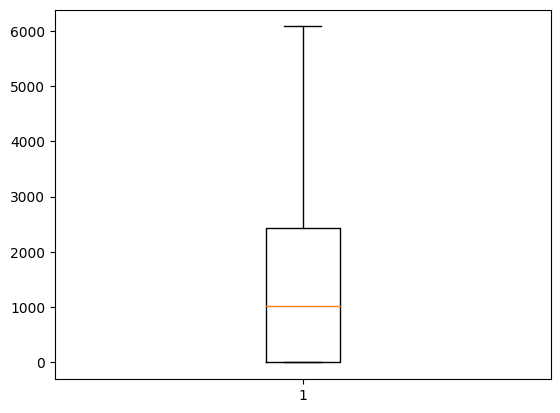

In [323]:
plt.boxplot(data2['CoapplicantIncome'])
plt.show()

In [324]:
Q1=np.percentile(data2['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(data2['LoanAmount'],50,interpolation='midpoint')
Q3=np.percentile(data2['LoanAmount'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

101.0
125.0
157.5


<ipython-input-324-6dc488fb089f>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['LoanAmount'],25,interpolation='midpoint')
<ipython-input-324-6dc488fb089f>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data2['LoanAmount'],50,interpolation='midpoint')
<ipython-input-324-6dc488fb089f>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.p

In [325]:
IQR=Q3-Q1
IQR

56.5

In [326]:
up_lim=Q3+1.5*IQR
up_lim

242.25

In [327]:
low_lim=Q1-1.5*IQR
low_lim

16.25

In [328]:
def handle_outliers(hand_loan_amount,low_lim,up_lim):
  for i in range(len(hand_loan_amount)):
    if hand_loan_amount[i]<low_lim:
      hand_loan_amount[i]=low_lim
    elif hand_loan_amount[i]>up_lim:
      hand_loan_amount[i]=up_lim
    else:
      hand_loan_amount[i]==hand_loan_amount
  return handle_outliers

In [329]:
new_loan_amount = data2['LoanAmount']
handle_outliers(new_loan_amount,low_lim,up_lim)
print(new_loan_amount)


0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64


<ipython-input-328-c94ae603347a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount[i]=up_lim


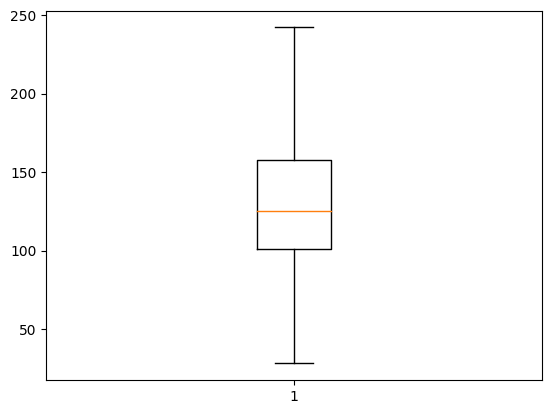

In [330]:
plt.boxplot(data2['LoanAmount'])
plt.show()

In [331]:
Q1=np.percentile(data2['Loan_Amount_Term'],25,interpolation='midpoint')
Q2=np.percentile(data2['Loan_Amount_Term'],50,interpolation='midpoint')
Q3=np.percentile(data2['Loan_Amount_Term'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

360.0
360.0
360.0


<ipython-input-331-0f55fe77a772>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['Loan_Amount_Term'],25,interpolation='midpoint')
<ipython-input-331-0f55fe77a772>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data2['Loan_Amount_Term'],50,interpolation='midpoint')
<ipython-input-331-0f55fe77a772>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

In [332]:
IQR=Q3-Q1
IQR

0.0

In [333]:
up_lim=Q3+1.5*IQR
up_lim

360.0

In [334]:
low_lim=Q1-1.5*IQR
low_lim

360.0

In [335]:
def handle_outliers(hand_loan_amount_term,low_lim,up_lim):
  for i in range(len(hand_loan_amount_term)):
    if hand_loan_amount_term[i]<low_lim:
      hand_loan_amount_term[i]=low_lim
    elif hand_loan_amount_term[i]>up_lim:
      hand_loan_amount_term[i]=up_lim
    else:
      hand_loan_amount_term[i]==hand_loan_amount_term
  return handle_outliers

In [336]:
new_loan_amount_term = data2['Loan_Amount_Term']
handle_outliers(new_loan_amount_term,low_lim,up_lim)
print(new_loan_amount_term)

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    360.0
Name: Loan_Amount_Term, Length: 367, dtype: float64


<ipython-input-335-155e38df9322>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount_term[i]=low_lim
<ipython-input-335-155e38df9322>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hand_loan_amount_term[i]=up_lim


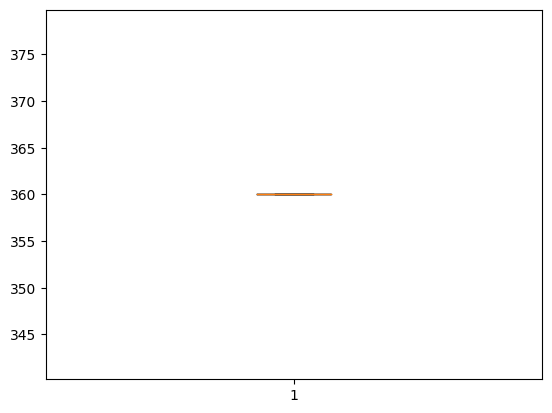

In [337]:
plt.boxplot(data2['Loan_Amount_Term'])
plt.show()

In [338]:
data2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4805.599455,1425.501362,131.957766,360.0,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,4910.685399,1600.086250,46.926185,0.0,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,360.0,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.0,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.0,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.0,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,72529.000000,6076.250000,242.250000,360.0,1.000000,2.000000


In [339]:
x1 = data2.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [340]:
x1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,367.000000,367.000000,367.000000
mean,4805.599455,1425.501362,131.957766
std,4910.685399,1600.086250,46.926185
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,101.000000
50%,3786.000000,1025.000000,125.000000
75%,5060.000000,2430.500000,157.500000
max,72529.000000,6076.250000,242.250000


In [341]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1 = min_max_scaler.fit_transform(x1)
x1

array([[0.07886501, 0.        , 0.38273046],
       [0.04241062, 0.24686279, 0.45740957],
       [0.06893794, 0.29623534, 0.84014002],
       ...,
       [0.04480966, 0.32799835, 0.45740957],
       [0.06893794, 0.39382843, 0.60676779],
       [0.12684581, 0.        , 0.32672112]])

In [342]:
x1=pd.DataFrame(x1,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.078865,0.000000,0.382730
1,0.042411,0.246863,0.457410
2,0.068938,0.296235,0.840140
3,0.032263,0.419008,0.336056
4,0.045168,0.000000,0.233372
...,...,...,...
362,0.055274,0.292450,0.396733
363,0.057329,0.116684,0.406068
364,0.044810,0.327998,0.457410
365,0.068938,0.393828,0.606768


In [343]:
x2=data2.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,360.0,1.0,2
1,2,1,1,0,1,360.0,1.0,2
2,2,1,2,0,1,360.0,1.0,2
3,2,1,2,0,1,360.0,1.0,2
4,2,0,0,1,1,360.0,1.0,2
...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,360.0,1.0,2
363,2,1,0,0,1,360.0,1.0,2
364,2,0,0,0,1,360.0,1.0,1
365,2,1,0,0,1,360.0,1.0,0


In [344]:
x3=pd.concat([x2,x1],axis=1)
x3

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,2,1,0,0,1,360.0,1.0,2,0.078865,0.000000,0.382730
1,2,1,1,0,1,360.0,1.0,2,0.042411,0.246863,0.457410
2,2,1,2,0,1,360.0,1.0,2,0.068938,0.296235,0.840140
3,2,1,2,0,1,360.0,1.0,2,0.032263,0.419008,0.336056
4,2,0,0,1,1,360.0,1.0,2,0.045168,0.000000,0.233372
...,...,...,...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,360.0,1.0,2,0.055274,0.292450,0.396733
363,2,1,0,0,1,360.0,1.0,2,0.057329,0.116684,0.406068
364,2,0,0,0,1,360.0,1.0,1,0.044810,0.327998,0.457410
365,2,1,0,0,1,360.0,1.0,0,0.068938,0.393828,0.606768


LOGISTIC REGRESSION

In [345]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
test_y_pred=logit_model.predict(x3)
test_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [346]:
loan_st=pd.DataFrame(test_y_pred,columns=['Loan_Status'])

In [347]:

loan_st

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [348]:
loan_st['Loan_Status'].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [349]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2,Yes,0,Graduate,1,5720,0,110.0,360.0,1.0,Urban
1,LP001022,2,Yes,1,Graduate,1,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,2,Yes,2,Graduate,1,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,2,Yes,2,Graduate,1,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,2,No,0,Not Graduate,1,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,2,Yes,3,Not Graduate,2,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,2,Yes,0,Graduate,1,4158,709,115.0,360.0,1.0,Urban
364,LP002980,2,No,0,Graduate,1,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,2,Yes,0,Graduate,1,5000,2393,158.0,360.0,1.0,Rural


In [350]:
l=data1.drop(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [351]:
log_reg=pd.concat([l,loan_st],axis=1)
log_reg

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [352]:
log_reg['Loan_Status']=log_reg['Loan_Status'].replace({1:'Y',0:'N'})
log_reg['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [353]:
log_reg

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [354]:
log_reg.to_csv('logreg_pred.csv',index=False)

In [355]:
#####Knn
classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
classifier.fit(x_train,y_train)
knn_y_pred = classifier.predict(x3)

In [356]:
knn=pd.DataFrame(knn_y_pred,columns=['Loan_Status'])
knn

,Loan_Status
0,0
1,0
2,0
3,0
4,0
...,...
362,0
363,0
364,0
365,0


In [357]:
knn_reg=pd.concat([l,knn],axis=1)
knn_reg

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,0
365,LP002986,0


In [358]:
knn_reg['Loan_Status']=knn_reg['Loan_Status'].replace({1:'Y',0:'N'})
knn_reg['Loan_Status'].value_counts()


N    367
Name: Loan_Status, dtype: int64

In [359]:
knn_reg

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [360]:
knn_reg.to_csv('KNN.csv',index=False)

In [361]:
###Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dec_y_pred = dt_clf.predict(x3)

In [362]:
dec=pd.DataFrame(dec_y_pred,columns=['Loan_Status'])
dec

,Loan_Status
0,0
1,0
2,0
3,0
4,0
...,...
362,0
363,0
364,0
365,1


In [363]:
dec_reg=pd.concat([l,dec],axis=1)
dec_reg

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,0
365,LP002986,1


In [364]:
dec_reg['Loan_Status']=dec_reg['Loan_Status'].replace({1:'Y',0:'N'})
dec_reg['Loan_Status'].value_counts()

N    316
Y     51
Name: Loan_Status, dtype: int64

In [365]:
dec_reg.to_csv('Decision_tree.csv',index=False)

In [366]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
rand_y_pred= rf_clf.predict(x3)

In [367]:
random=pd.DataFrame(rand_y_pred,columns=['Loan_Status'])
random_reg=pd.concat([l,random],axis=1)
random_reg['Loan_Status']=random_reg['Loan_Status'].replace({1:'Y',0:'N'})
random_reg['Loan_Status'].value_counts()

N    272
Y     95
Name: Loan_Status, dtype: int64

In [368]:
random_reg.to_csv('Random_forest.csv',index=False)

In [369]:
### svm
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
svm_y_pred= svmclf.predict(x3)

In [370]:
svm=pd.DataFrame(svm_y_pred,columns=['Loan_Status'])
svm_reg=pd.concat([l,svm],axis=1)
svm_reg['Loan_Status']=svm_reg['Loan_Status'].replace({1:'Y',0:'N'})
svm_reg['Loan_Status'].value_counts()

N    222
Y    145
Name: Loan_Status, dtype: int64

In [371]:
svm_reg.to_csv('svm.csv',index=False)

In [372]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)
hyper_y_pred= rf_clf.predict(x3)

In [373]:
hyper=pd.DataFrame(hyper_y_pred,columns=['Loan_Status'])
hyper_reg=pd.concat([l,hyper],axis=1)
hyper_reg['Loan_Status']=hyper_reg['Loan_Status'].replace({1:'Y',0:'N'})
hyper_reg['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [374]:
hyper_reg.to_csv('hyper.csv',index=False)